In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lectura de datos y conversión a los tipos correctos

In [14]:
data = pd.read_csv(
    'customer_shopping_data.csv', 
    sep=',',
    dtype={
        'invoice_no': str,
        'customer_id': str,
        'gender': str,
        'age': int,
        'category': str,
        'quantity': int,
        'price': float,
        'payment_method': str,
        'shopping_mall': str
    }
)
data['invoice_no'] = data['invoice_no'].astype('category')
data['customer_id'] = data['customer_id'].astype('category')
data['gender'] = data['gender'].astype('category')
data['category'] = data['category'].astype('category')
data['payment_method'] = data['payment_method'].astype('category')
data['shopping_mall'] = data['shopping_mall'].astype('category')
data['invoice_date'] = data['invoice_date'].apply(lambda x: pd.Timestamp(x).date())
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [15]:
# Reemplazar espacios en blanco en el dataset inicial por NaN
data = data.replace(r'^\s+$', np.nan, regex=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   invoice_no      99457 non-null  category
 1   customer_id     99457 non-null  category
 2   gender          99457 non-null  category
 3   age             99457 non-null  int64   
 4   category        99457 non-null  category
 5   quantity        99457 non-null  int64   
 6   price           99457 non-null  float64 
 7   payment_method  99457 non-null  category
 8   invoice_date    99457 non-null  object  
 9   shopping_mall   99457 non-null  category
dtypes: category(6), float64(1), int64(2), object(1)
memory usage: 9.7+ MB


# Análisis de datos

## Cambiar nombre de las columnas

In [17]:
data = data.rename(columns={
    'invoice_no': 'id_factura',
    'customer_id': 'id_cliente',
    'gender': 'genero',
    'age': 'edad',
    'category': 'categoria',
    'quantity': 'cantidad',
    'price': 'precio_unitario',
    'payment_method': 'metodo_pago',
    'invoice_date': 'fecha_factura',
    'shopping_mall': 'centro_comercial'
})
data.head()

,id_factura,id_cliente,genero,edad,categoria,cantidad,precio_unitario,metodo_pago,fecha_factura,centro_comercial
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


## Remover datos duplicados exactos

In [18]:
# No hay datos duplicados exactos
print('Número de duplicados:', data.duplicated().sum())

Número de duplicados: 0


In [19]:
missing = data.isnull().sum()
print('Porcentaje de datos nulos:', len(missing[missing>0]*100/len(data)))

Porcentaje de datos nulos: 0


## Análisis de variables categóricas

In [20]:
cat_cols = list(data.select_dtypes('category').columns)

In [21]:
cat_cols

['id_factura',
 'id_cliente',
 'genero',
 'categoria',
 'metodo_pago',
 'centro_comercial']

In [22]:
# Observamos qué valores únicos presentan las variables categóricas
for col in data:
    if col in cat_cols:
        print(f"{col} = {data[col].unique()}")

id_factura = ['I138884', 'I317333', 'I127801', 'I173702', 'I337046', ..., 'I219422', 'I325143', 'I824010', 'I702964', 'I232867']
Length: 99457
Categories (99457, object): ['I100008', 'I100014', 'I100015', 'I100024', ..., 'I999959', 'I999972', 'I999973', 'I999994']
id_cliente = ['C241288', 'C111565', 'C266599', 'C988172', 'C189076', ..., 'C441542', 'C569580', 'C103292', 'C800631', 'C273973']
Length: 99457
Categories (99457, object): ['C100004', 'C100005', 'C100006', 'C100012', ..., 'C999910', 'C999974', 'C999976', 'C999995']
genero = ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
categoria = ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
Categories (8, object): ['Books', 'Clothing', 'Cosmetics', 'Food & Beverage', 'Shoes', 'Souvenir', 'Technology', 'Toys']
metodo_pago = ['Credit Card', 'Debit Card', 'Cash']
Categories (3, object): ['Cash', 'Credit Card', 'Debit Card']
centro_comercial = ['Kanyon', 'Forum Istanbul', 'Metroc

Se muestra que hay alta cardinalidad en las variables de id_cliente y id_factura, es decir, hay un valor unico por cada registro, por lo que no hay valor agregado en analizar los datos a partir de estas variables

In [23]:
len(data['id_cliente'].unique())

99457

In [24]:
len(data['id_factura'].unique())

99457

Se muestra un conteo de valores por cada variable categórica

In [25]:
# La mayoría de transacciones fueron realizadas por mujeres
data['genero'].value_counts()

genero
Female    59482
Male      39975
Name: count, dtype: int64

In [26]:
# La categoría de productos más comprada es ropa, y la que menos se compra son los libros
data['categoria'].value_counts()

categoria
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='categoria'>

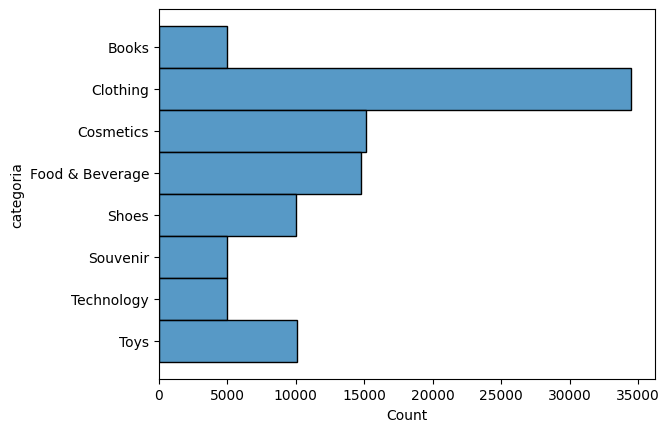

In [31]:
sns.histplot(data=data, y='categoria')

In [32]:
# El método de pago más utilizado es el efectivo
data['metodo_pago'].value_counts()

metodo_pago
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [33]:
# El centro comercial que mayor volúmen de operaciones es "Mall of Istanbul"
data['centro_comercial'].value_counts()

centro_comercial
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='centro_comercial'>

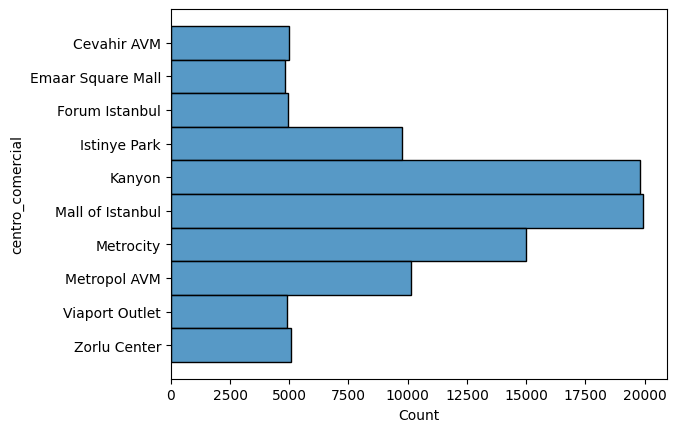

In [34]:
sns.histplot(data=data, y='centro_comercial')

No se observaron valores extraños en las variables categóricas.

## Análisis de variables numéricas

In [35]:
# Se presentan las principales estadísticas de las variables numéricas
data.describe()

,edad,cantidad,precio_unitario
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


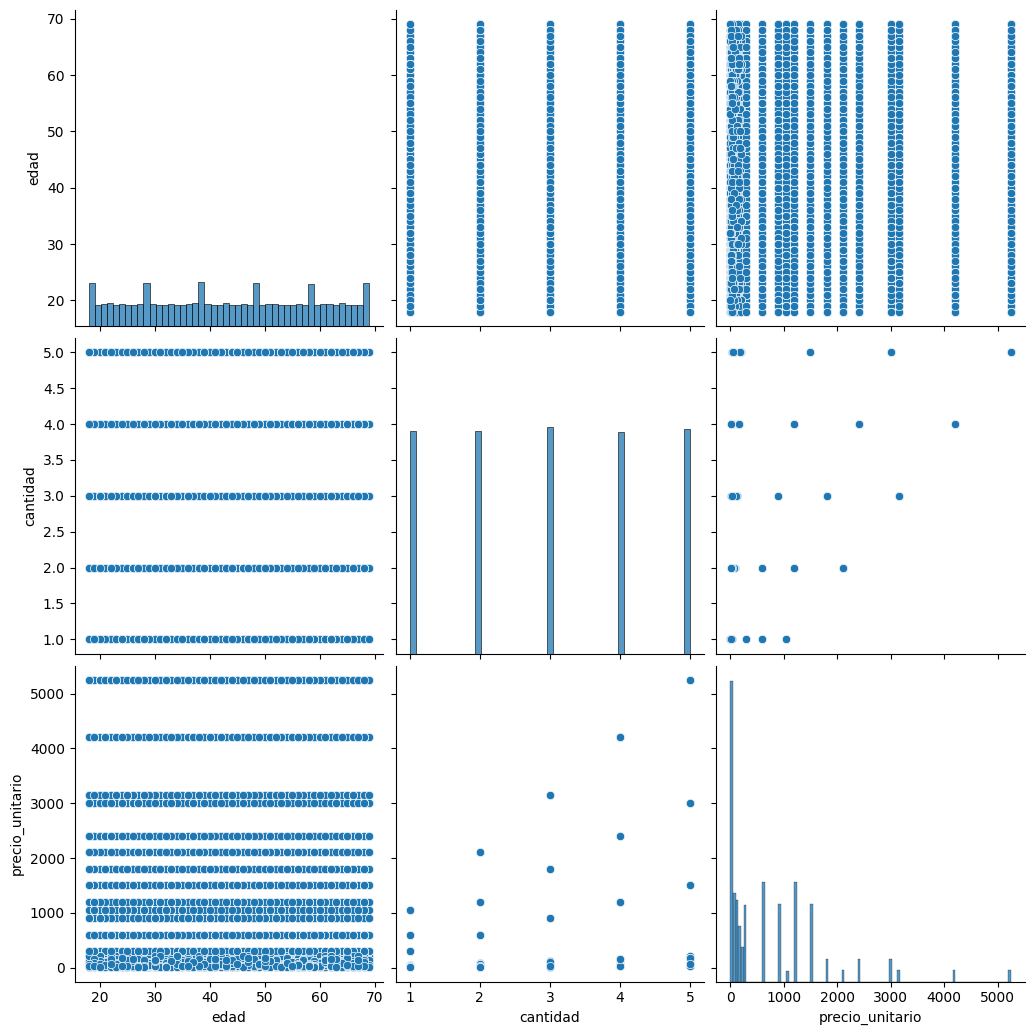

In [37]:
# Matriz de gráficos scatter
sns.pairplot(data, height=3.5);
plt.show()

Observando los gráficos de dispersión podemos notar que entre las diferentes variables no existe una relación marcada que permita inferir que el comportamiento de una determine el de otra.

[]

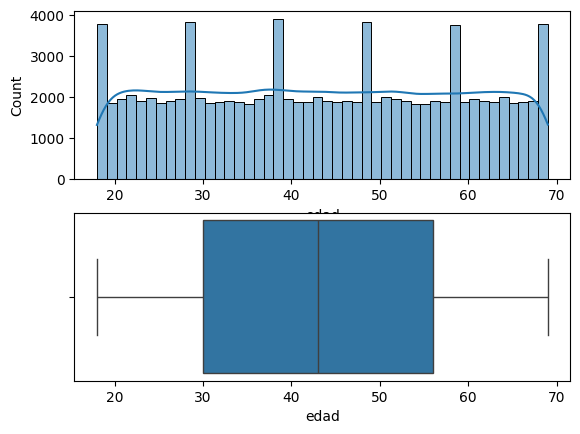

In [38]:
fig, axes = plt.subplots(2, 1)

sns.histplot(data=data, x="edad", kde=True, ax=axes[0])
sns.boxplot(x="edad", data=data, ax=axes[1])
plt.plot()

En la variable edad, no se observa un comportamiento extraño.

[]

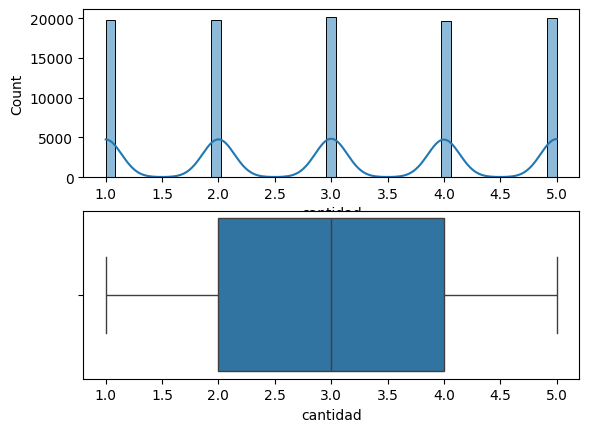

In [39]:
fig, axes = plt.subplots(2, 1)

sns.histplot(data=data, x="cantidad", kde=True, ax=axes[0])
sns.boxplot(x="cantidad", data=data, ax=axes[1])
plt.plot()

En la variable cantidad tampoco se observa un comportamiento anómalo en los datos.

[]

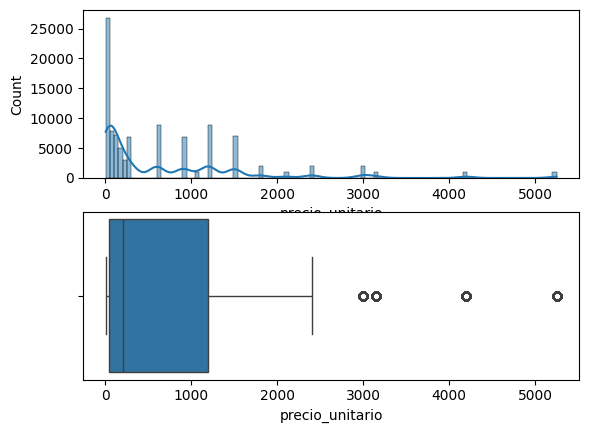

In [40]:
fig, axes = plt.subplots(2, 1)

sns.histplot(data=data, x="precio_unitario", kde=True, ax=axes[0])
sns.boxplot(x="precio_unitario", data=data, ax=axes[1])
plt.plot()

En la variable precio_unitario se observan, en primera instancia, unos datos atípicos, sin embargo, hay que recordar que el precio depende de la categoría del producto, y al no ser todos de la misma categoría, es posible que existan diferencias marcadas entre los precios de los mismos.

<Axes: >

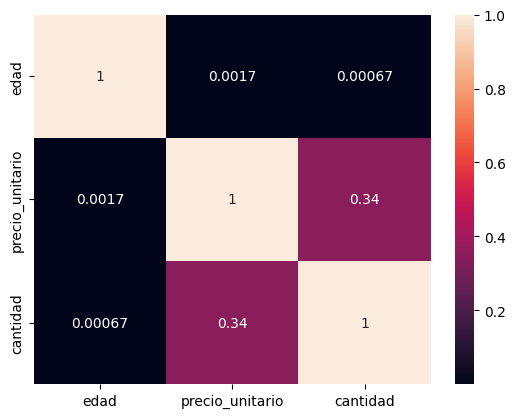

In [41]:
sns.heatmap(data[['edad', 'precio_unitario', 'cantidad']].corr(),annot=True)

La correlación entre las variables numéricas es baja.